### What is Smoothing?
Smoothing is a statistical technique used to remove noise from data, particularly in time series analysis, to reveal underlying trends and patterns more clearly.

### Why Use Smoothing?
1. **Trend Identification**: Smoothing helps highlight trends in data by filtering out short-term fluctuations and noise, making it easier to analyze long-term patterns.

2. **Enhanced Forecasting**: By providing a clearer view of the underlying data, smoothing can improve the accuracy of forecasts and predictions.

3. **Data Interpretation**: It simplifies the data, making it more interpretable for decision-making and presenting to stakeholders.

4. **Noise Reduction**: Smoothing techniques can minimize the impact of random variations and outliers, resulting in a more stable dataset for analysis.

# **UNDERSTAND** the difference between Interpolation and Extrapolation

## Interplotation
 - Choosing specific date range and trying to predict the future.
 - Prediction made are completely supervised.
 - **Aim** here is to **choose a specific date range** and **predict the future**.
 
## Extrapolation
 - Output will be predicted using previous time stamps.
 - We are dependent only on time lags(T, T+1, T-1...)
 - **Aim** here is to **forcast for future using past lags**.

# Smoothing Time Series

In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from datetime import datetime

In [6]:
df = pd.read_csv("C:/Users/kmsva/Desktop/scaling/train.csv")

In [7]:
df.head(10)

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808
5,2010-01-06,0,0,812
6,2010-01-07,0,0,830
7,2010-01-08,0,0,812
8,2010-01-09,0,0,817
9,2010-01-10,0,0,832


In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df.set_index('Date', inplace=True)
print(df.head())

            store  product  number_sold  number_sold_ROLL
Date                                                     
2010-01-01      0        0          801               NaN
2010-01-02      0        0          810               NaN
2010-01-03      0        0          818        809.666667
2010-01-04      0        0          796        808.000000
2010-01-05      0        0          808        807.333333


In [23]:

df['number_sold_ROLL'] = df['number_sold'].rolling(window=3).mean()



In [20]:
df['Smoothed_MA'] = df['number_sold'].rolling(window=7).mean()

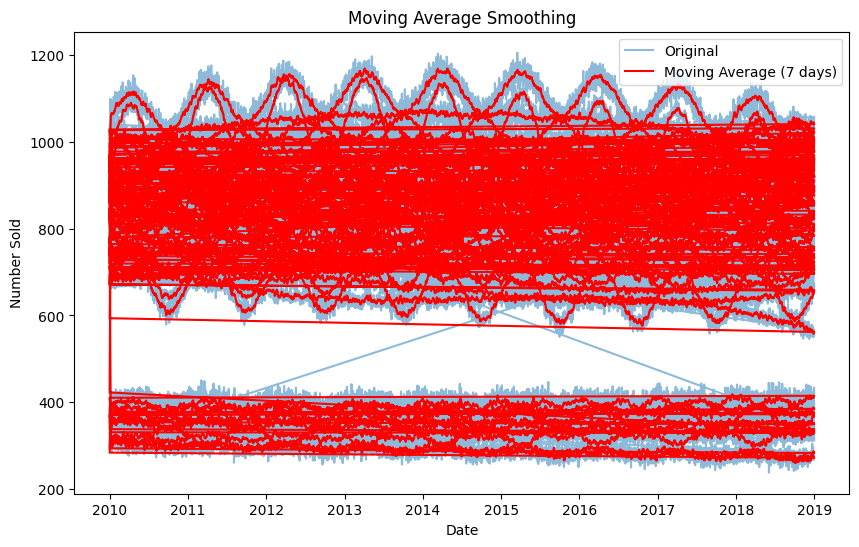

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['number_sold'], label='Original', alpha=0.5)
plt.plot(df.index, df['Smoothed_MA'], label='Moving Average (7 days)', color='red')
plt.title('Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Number Sold')
plt.legend()
plt.show()

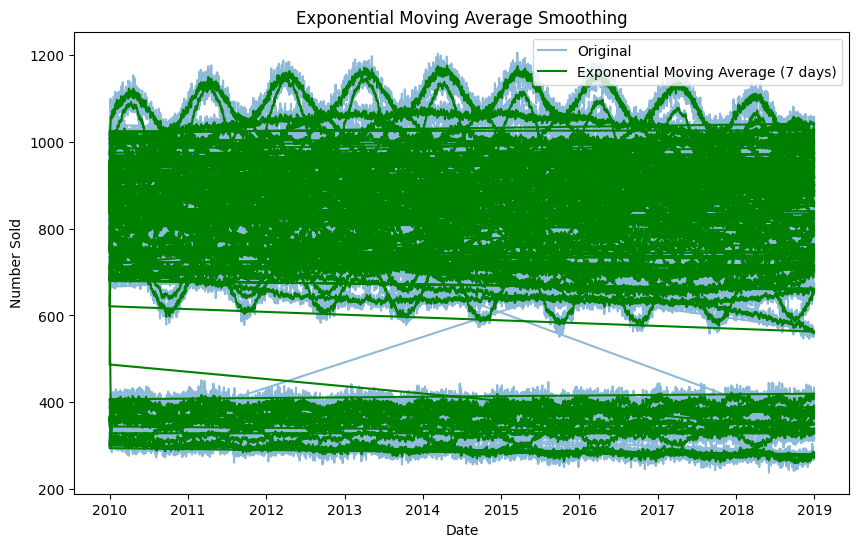

In [22]:
df['Smoothed_EMA'] = df['number_sold'].ewm(span=7, adjust=False).mean()

# Plot the original vs. smoothed df
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['number_sold'], label='Original', alpha=0.5)
plt.plot(df.index, df['Smoothed_EMA'], label='Exponential Moving Average (7 days)', color='green')
plt.title('Exponential Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Number Sold')
plt.legend()
plt.show()

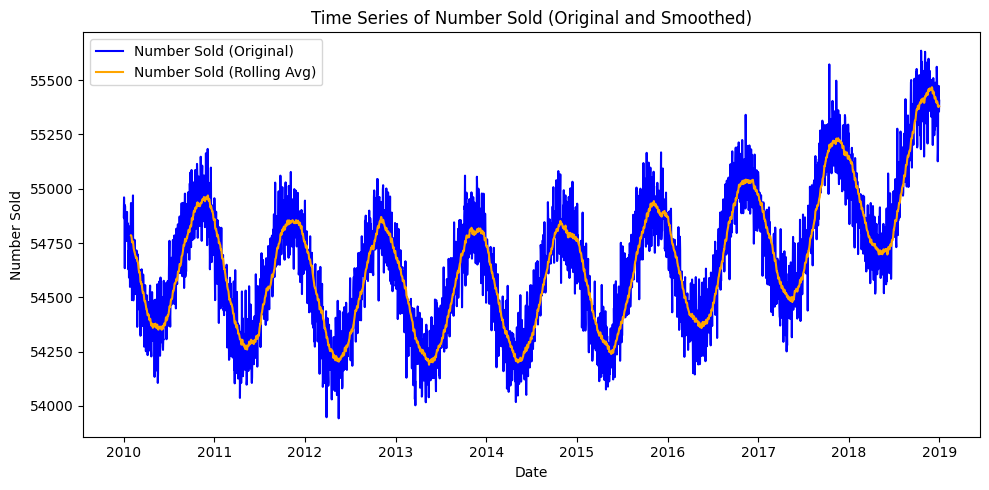

In [27]:
aggregated_data = df.groupby('Date')['number_sold'].sum()

# Calculate a rolling average (using a 30-day window)
rolling_avg = aggregated_data.rolling(window=30).mean()

# Create the plot
plt.figure(figsize=(10, 5))

# Plot the original time series
plt.plot(aggregated_data.index, aggregated_data, label='Number Sold (Original)', color='blue')

# Plot the smoothed (rolling average) time series
plt.plot(rolling_avg.index, rolling_avg, label='Number Sold (Rolling Avg)', color='orange')

# Add titles and labels
plt.title('Time Series of Number Sold (Original and Smoothed)')
plt.xlabel('Date')
plt.ylabel('Number Sold')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

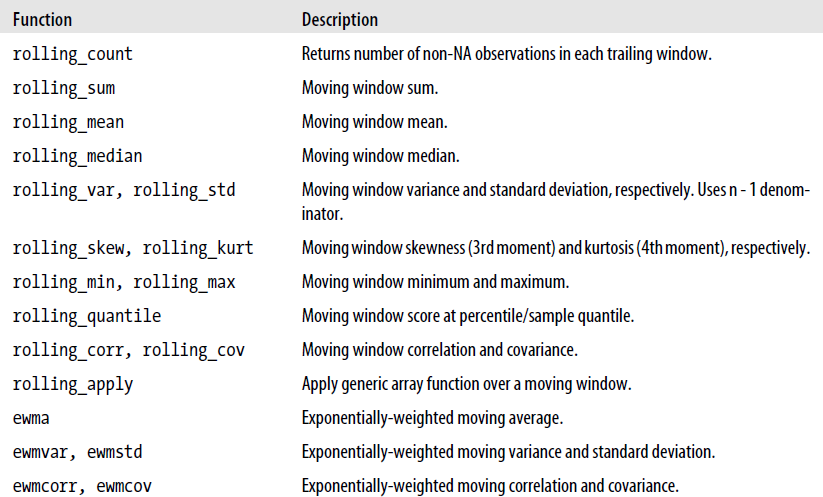